NoteBook to try some example algorithms in python from the reinforcement learning book. Originally the algorithms I implemented on MATLAB have been translated into python code. 
The basis problem is a grid of squares where the terminal states are square 1,and the final square. The policy implemented contains a grid of numbers, where in each square is the index the player should move to from that square.


# The Actual Value Function (for the policy pi)

In [4]:
import numpy as np


alpha, gamma, n = 0.5, 0.9, 200    #step parameter, discount factor, number of episodes
V = np.zeros((9,1))                #arbitrary initial V estimate  
R = np.ones((9,1))                    
R[0], R[8] = 0, 0                  #reward array
S0_arr = np.random.randint(0,9,n)  #Generate starting states (1,to 9)

pi = np.array([0,0,1,0,1,8,7,8,8]) #policy array - each number points to the next location

P = np.array([[1,0,0,0,0,0,0,0,0],
             [1,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0],
             [1,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0,1,0],
             [0,0,0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0,0,1]]) #Prob matrix of policy

VActual = np.matmul(np.linalg.inv(np.eye(9)-gamma*P),R) #Solve bellman equation
VActual

array([[0. ],
       [1. ],
       [1.9],
       [1. ],
       [1.9],
       [1. ],
       [1.9],
       [1. ],
       [0. ]])

# TD[0] (One Step TD) Implementation

In [5]:

alpha, gamma, n = 0.5, 0.9, 200    #step parameter, discount factor, number of episodes
V = np.zeros((9,1))                #arbitrary initial V estimate  
R = np.ones((9,1))                    
R[0], R[8] = 0, 0                  #reward array
S0_arr = np.random.randint(0,9,n)  #Generate starting states (1,to 9)

#initially use for loops though I'm aware it's not the fastest way.
for i in range(n):
    S = S0_arr[i]          #choose random starting state
    running = True         #true until the terminal state is reached
    while running:
        if S == 0 or S == 8:
            running = False
        else:
            Snew = pi[S]
            V[S] = V[S] + alpha*(R[S]+gamma*V[Snew]-V[S])
            S = Snew

print("The difference between the estimate and the actual value function is : \n", V-VActual)


The difference between the estimate and the actual value function is : 
 [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.42195706e-08]
 [-1.22070312e-04]
 [-9.69236730e-07]
 [-1.52587891e-05]
 [-4.75538693e-07]
 [-1.77635684e-15]
 [ 0.00000000e+00]]


# Simple 3x3 Grid Q Learning Implementation

Slightly different implementation of the 3x3 grid idea, where the Q table has actions 0-3; up, right, down, left in that order ascending. Rows of the Q table are the states and the columns are the possible actions. This method learns the optimum policy as the iterations of episodes update the Q values.

In [1]:
import numpy as np

#Takes the arr from Q with one state and multiple actions, finds highest value and returns the index of the action column
def get_max_A(arr):
    indices = np.where(arr == np.amax(arr)) #indices of maximum Q value of the array
    return indices[0][0]

#takes input of action and returns new state according to board physics
def change_state(S,A):
    #Don't move if at the board edge. Otherwise 0 up, 1 right, 2 down, 3 left
    if((S % 3 == 0 and A == 3) or (S < 3 and A == 0) or (S > 5 and A == 2) or (S % 3 == 2 and A == 1)):
        return S
    elif(A == 0):
        return S-3
    elif(A == 1):
        return S+1
    elif(A == 2):
        return S+3
    elif(A == 3):
        return S-1
    else:
        print('change_state() broken at state {} and action {}'.format(S,A))
        return S

alpha, gamma, n = 0.5, 0.9, 200    #step parameter, discount factor, number of episodes

Q = np.zeros((9,4))                #arbitrary initial Q Table estimate ((9 states, 4 actions) value function)

#set up reward so if an action would take it off the board, make it stay still and lose 10 reward, otherwise reward=-1
R = np.array([[-10, -1, -1, -10],
              [-10, -1, -1,  -1],
              [-10,-10, -1,  -1],
              [ -1, -1, -1, -10],
              [ -1, -1, -1,  -1],
              [ -1,-10, -1,  -1],
              [ -1, -1,-10, -10],
              [ -1, -1,-10,  -1],
              [ -1,-10,-10,  -1]])
S0_arr = np.random.randint(0,9,n)  #Generate starting states (1,to 9)

for i in range(n):
    S = S0_arr[i]          #choose random starting state
    Snew = S               #Set Snew to fix the algorithm
    running = True         #true until the terminal state is reached (S = 0 or 8)
    # iteration = 1
    while running:
        if S == 0 or S == 8:
            running = False
        else:
            Amax = get_max_A(Q[S,:])       #Get action that maximizes current move
            Snew = change_state(S,Amax)    #Find out the new state according to the action
            Anewmax = get_max_A(Q[Snew,:]) #Get action that maximizes the next move
            Q[S,Amax] = Q[S,Amax] + alpha*(R[S,Amax]+ gamma*Q[Snew,Anewmax] - Q[S,Amax]) #Update Q
            S = Snew                         #Update state
            # print('Iteration {} at state {}'.format(iteration,S)) #debugging iteration check
            # iteration += 1

print('Final Q: {}'.format(Q))
#Find the optimum policy from Q:
optimum_pi = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        optimum_pi[j,i] = change_state(i+j*3,get_max_A(Q[i+j*3,:]))
optimum_pi[2,2] = 8
print("optimum policy:\n {}".format(optimum_pi))

Final Q: [[ 0.          0.          0.          0.        ]
 [-5.         -1.0875     -1.65399219 -1.        ]
 [-5.         -5.         -1.899746   -1.89973215]
 [-1.         -1.2        -1.239375   -5.        ]
 [-1.88683733 -1.88131438 -1.88529925 -1.88679201]
 [-1.18875    -5.         -1.         -1.63121094]
 [-1.89987183 -1.8998661  -5.         -5.        ]
 [-1.42625    -1.         -5.         -1.0875    ]
 [ 0.          0.          0.          0.        ]]
optimum policy:
 [[0. 0. 1.]
 [0. 5. 8.]
 [7. 8. 8.]]


# 4x4 Grid Using SARSA and epsilon-greedy policy (coupled into one environment with Q-Learning)

Below I propose a class which can do either Q Learning or SARSA on a 4x4 grid example with walls (using the style from https://github.com/viethoangtranduong/reinforcement-learning/blob/main/SARSA%20vs%20QL/CartPole_Agent.ipynb for using the environment as a class with a train() method).

It uses a grid laid out as below, where the player starts in a random position and has to make their way to 'F' as the end state. The reward received is -1 for every step, though moving through a wall (shown by the lines) gives -10 reward. The dynamics are not deterministic as each action taken has 50% of changing the state.
 ``` 
 {F, ,  , },
 {_,_,_ , },
 { , ,_|, },
 { , ,  , }
 ``` 

To initialize the environment, create an object using grid_4x4_ex() and then use the train() method with all relevant input variables. The trained policy printed by this method displays in each square the index that should be next moved to if in that state. For the input variables see below, though note that 'fr_gap' defines that every 'fr_gap' iterations, a random value from -10 to -1 is assigned to the reward instead of the correct value (to model an adversarial attack), which is discussed in the next section. To remove this effect, set it to 0. Currently this environment works with either SARSA or Q-Learning.
Then to test out the trained policy (will be the policy output of the last time train() was called on that object), use test_opt_policy() which prints out a matrix of the average reward when starting in each state, then also the overall average reward from that matrix as an indicator of policy performance.

train() input variables: algtype should be a string that is either 'QL' or 'SARSA'. alpha is the step size parameter float, gamma is the future discount factor float. Epsilon is used for SARSA for the epsilon-greedy policy, where it has a epsilon probability of taking a random action (exploration) and 1-epsilon probability of taking the optimum action (exploitation). The number of training episodes is an int 'n', 'fr_gap' is as above and print_flag is set as True as default but can be set to False to stop printing the trained policy.

In [1]:
import numpy as np
import random as rndm

#Single argument to initialize for the type of algorithm. Either "QL" or "SARSA"
#If using Q-Learning, choice of epsilon is arbitrary but must be provided as an argument.
class grid_4x4_ex():
    def __init__(self):
        #update: Change so this is in train()
        #set up reward so if an action would take it off the board, make it stay still and lose 10 reward, otherwise reward
        # {F, , ,  },
        # {_,_,_,  },
        # { , ,_|, },
        # { , , ,  }
        self.R = np.array([[-10, -1, -1,-10], [-10, -1, -1, -1], [-10, -1, -1, -1], [-10,-10, -1, -1],
                           [ -1, -1,-10,-10], [ -1, -1,-10, -1], [ -1, -1,-10, -1], [ -1,-10, -1, -1],
                           [-10, -1, -1,-10], [-10, -1, -1, -1], [-10,-10,-10, -1], [ -1,-10, -1,-10],
                           [ -1, -1,-10,-10], [ -1, -1,-10, -1], [-10, -1,-10, -1], [ -1,-10,-10, -1]])

    
    #Takes the arr from Q with one state and multiple actions, finds highest value and returns the index of the action column
    def choose_A(self, arr, isExploit):
        if isExploit:
            indices = np.where(arr == np.amax(arr)) #indices of maximum Q value of the array
            return indices[0][0]
        else:
            return rndm.randint(0,3)

    #takes input of action and returns new state according to board physics. Isn't deterministic.
    #opt_pol_mode as True forces a deterministic change_state() to help figure out the optimum policy matrix.
    def step(self, S, A, opt_pol_mode):
        #Don't move if at the board edge. Otherwise 0 up, 1 right, 2 down, 3 left
        doMove = rndm.randint(0,1) #50% chance of action actually changing state
        
        if((S % 4 == 0 and A == 3) or (S < 4 and A == 0) or (S > 11 and A == 2) or (S % 4 == 3 and A == 1) or (doMove == 0 and not opt_pol_mode)):
            return S 
        elif(A == 0):
            return S-4
        elif(A == 1):
            return S+1
        elif(A == 2):
            return S+4
        elif(A == 3):
            return S-1
        else:
            print('change_state() broken at state {} and action {}'.format(S,A))
            return S

    #trains a policy based on the algtype algorithm given and other parameters
    def train(self, algtype, alpha, gamma, epsilon, n, fr_gap, print_flag=True):
        if algtype not in {"QL", "SARSA"}:
            print("Invalid algorithm type, needs to be 'QL' or 'SARSA'. Default is 'QL'")
            self.algtype = "QL"
        else:
            self.algtype = type
        
        Q = np.zeros((16,4))  #arbitrary initial Q Table estimate ((16 states, 4 actions) value function)
        S0_arr = np.random.randint(0,16,n)  #Generate starting states (0 to 15)
        step_mode = False #Uses the step() function for it's purpose within the algorithm as non-deterministic.
        for i in range(n):
            S = S0_arr[i]          #choose random starting state
            Snew = S               #Set Snew to fix the algorithm
            running = True         #true until the terminal state is reached (S = 0)
            iteration = 1

            #SARSA version uses epsilon greedy policy to update Q, Q-Learning uses the greedy policy
            #Epsilon=0 is pure exploitation, 1 is pure exploration.
            #Both algorithms use an epsilon greedy policy to select the current action
            isExploit = True
            while running:
                if S == 0:
                    running = False
                else:
                    rand_num = rndm.uniform(0,1)
                    isExploit = rand_num > epsilon           #epsilon-greedy
                    Amax = self.choose_A(Q[S,:], isExploit)  #Get action for current move
                    Snew = self.step(S, Amax, step_mode)     #Find out the new state according to the action

                    isExploit = not (self.algtype == "SARSA" and not isExploit)
                    Anewmax = self.choose_A(Q[Snew,:], isExploit) #Get action to update Q with

                    if(fr_gap != 0 and iteration % fr_gap == 0):
                        Q[S,Amax] = Q[S,Amax] + alpha*(rndm.randint(-10,-1) + gamma*Q[Snew,Anewmax] - Q[S,Amax]) #Update Q
                    else:
                        Q[S,Amax] = Q[S,Amax] + alpha*(self.R[S,Amax]+ gamma*Q[Snew,Anewmax] - Q[S,Amax]) #Update Q
                    S = Snew                         #Update state
                    iteration += 1

        #Finding the optimum policy from Q table:
        self.optimum_pi = np.zeros((16,1))
        for i in range(16):
            opt_pol_mode = True #forces a deterministic step() to figure out the optimum policy matrix
            self.optimum_pi[i] = self.step(i, self.choose_A(Q[i,:],isExploit=True), opt_pol_mode)
        if(print_flag):
            print("optimum policy:\n {}".format(self.optimum_pi.reshape(4,4)))
        return self.optimum_pi

    #For a given Snew and S, find the action that moves between the two.
    def find_A(self, S, Snew):
        diff = (Snew-S).astype(int)
        diff_mapping = {
        -4: 0,
         1: 1,
         4: 2,
        -1: 3
        }
        return diff_mapping.get(diff[0], 0) #return action 0 if not found as default


    #Does a n_test episodes and counts average reward for each starting square (with a ceiling cut-off for num of tries)
    #Then averages that reward over all squares for a single result.
    def test_opt_policy(self,print_flag=True):
        n_test = 1600              #About 100 tries for each state
        S0_arr = np.zeros(n_test)  #Generate starting states by going through all states repeatedly
        for i in range(n_test):
            S0_arr[i] = i % 16
        S0_arr = S0_arr.astype(int)

        #results is the total reward from episodes starting in that state, no_of_starts is the total times started in that state.
        results = np.zeros((16,1))       
        no_of_starts = np.zeros((16,1))

        for i in range(n_test):
            current_R = 0          #reward for this episode
            S = S0_arr[i]          #choose random starting state
            no_of_starts[S0_arr[i]] += 1
            Snew = S               #Set Snew to fix the algorithm
            running = True         #true until the terminal state is reached (S = 0)
            iteration = 1
            while running:
                if S == 0 or iteration == 16: #limit on 16 iterations for an episode before it ends
                    running = False
                else:
                    A = self.find_A(S, self.optimum_pi[S].astype(int)) #use the Snew from the optimum policy matrix then find corresponding action from S to Snew
                    current_R += self.R[S,A]         #update reward for this step
                    Snew = self.step(S,A,False) #False is so it's not in optimum policy mode
                    S = Snew 
                    iteration += 1
            results[S0_arr[i]] += current_R #add the total reward for this episode to the correct starting state location
        results = np.divide(results,no_of_starts)
        if print_flag:
            print("Average reward matrix:\n ",results.reshape(4,4))
            print("Mean of matrix rewards: ",np.average(results))
        return results
    
    
    
#     def test_naive_attack(self,print_flag=True):
#         n_test = 1600              #About 100 tries for each state
#         S0_arr = np.zeros(n_test)  #Generate starting states by going through all states repeatedly
#         for i in range(n_test):
#             S0_arr[i] = i % 16
#         S0_arr = S0_arr.astype(int)

#         #results is the total reward from episodes starting in that state, no_of_starts is the total times started in that state.
#         results = np.zeros((16,1))       
#         no_of_starts = np.zeros((16,1))

#         for i in range(n_test):
#             current_R = 0          #reward for this episode
#             S = S0_arr[i]          #choose random starting state
#             no_of_starts[S0_arr[i]] += 1
#             Snew = S               #Set Snew to fix the algorithm
#             running = True         #true until the terminal state is reached (S = 0)
#             iteration = 1
#             while running:
#                 if S == 0 or iteration == 16: #limit on 16 iterations for an episode before it ends
#                     running = False
#                 else:
#                     A = self.find_A(S, self.optimum_pi[S].astype(int)) #use the Snew from the optimum policy matrix then find corresponding action from S to Snew
#                     current_R += self.R[S,A]         #update reward for this step
#                     Snew = self.step(S,A,False) #False is so it's not in optimum policy mode
#                     S = Snew 
#                     iteration += 1
#             results[S0_arr[i]] += current_R #add the total reward for this episode to the correct starting state location
#         results = np.divide(results,no_of_starts)
#         if print_flag:
#             print("Average reward matrix:\n ",results.reshape(4,4))
#             print("Mean of matrix rewards: ",np.average(results))
#         return results
    
        
    #repeatedly trains (n_repeats times) using the algtype algorithm using the same parameters as train(), then tests them, then accumulates the average reward outputs and finds an overall average
    def repeat_train_test(self, algtype, alpha, gamma, epsilon, n_train, fr_grap, n_repeats, print_flag=True):
        results = np.zeros((16,1))
        for i in range(n_repeats):
            print("Completing run through", i)
            self.train(algtype, alpha, gamma, epsilon, n_train, fr_grap, print_flag)
            results += self.test_opt_policy(print_flag)
        results = results/n_repeats
        print("Average reward matrix:\n ",results.reshape(4,4))
        print("Mean of matrix rewards: ",np.average(results))

In [2]:
algtype = "QL" #Either QL or SARSA works
alpha = 0.5       #step parameter
gamma = 0.9       #discount factor
epsilon = 0.01    #exploration parameter (0 for pure exploitation, 1 for pure exploration)
n = 16000          #number of episodes 
fr_gap = 0        #gap between iterations for false rewards provided (0 for no false rewards)
n_repeats = 10
print_flag = True

test_env = grid_4x4_ex()
# test_env.train(algtype,alpha,gamma,epsilon,n,fr_gap)
# test_env.test_opt_policy()
test_env.repeat_train_test(algtype, alpha, gamma, epsilon, n, fr_gap, n_repeats, print_flag)

Completing run through 0
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  5.  6.]
 [ 9. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -1.87  -3.91  -5.98]
 [ -1.93  -3.85  -5.93  -7.58]
 [-14.77 -14.53 -14.84  -9.93]
 [-14.59 -13.86 -12.97 -11.72]]
Mean of matrix rewards:  -8.64125
Completing run through 1
optimum policy:
 [[ 0.  0.  1.  7.]
 [ 0.  4.  5.  6.]
 [ 9. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -1.83  -3.97  -9.96]
 [ -1.93  -4.13  -6.29  -8.04]
 [-14.82 -14.7  -14.75  -9.64]
 [-14.58 -14.03 -12.63 -11.46]]
Mean of matrix rewards:  -8.9225
Completing run through 2
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  4.  2.  3.]
 [ 9. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -1.9   -4.08  -6.35]
 [ -2.11  -3.96  -6.    -7.2 ]
 [-14.88 -14.41 -14.84  -9.92]
 [-14.74 -14.11 -13.2  -11.75]]
Mean of matrix rewards:  -8.715625
Completing run through 3
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  2.  6.]
 [12. 13.  

In [3]:
algtype = "SARSA" #Either QL or SARSA works
test_env.repeat_train_test(algtype, alpha, gamma, epsilon, n, fr_gap, n_repeats, print_flag)

Completing run through 0
optimum policy:
 [[ 0.  0.  6.  7.]
 [ 0.  4.  5.  6.]
 [ 9. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -1.71  -7.74  -9.81]
 [ -1.91  -3.79  -6.16  -8.34]
 [-14.92 -14.62 -14.84 -10.03]
 [-14.46 -14.01 -12.67 -11.4 ]]
Mean of matrix rewards:  -9.150625000000002
Completing run through 1
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  5.  6.]
 [ 9. 13.  9.  7.]
 [ 8. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -2.04  -4.06  -5.59]
 [ -2.01  -3.76  -5.89  -7.92]
 [-14.83 -14.46 -14.83  -9.64]
 [-14.93 -13.84 -12.84 -11.3 ]]
Mean of matrix rewards:  -8.62125
Completing run through 2
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  5.  6.]
 [12. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward matrix:
  [[  0.    -1.99  -3.6   -5.81]
 [ -1.84  -4.02  -6.32  -8.47]
 [-14.74 -14.63 -14.8  -10.08]
 [-14.31 -13.99 -13.05 -11.4 ]]
Mean of matrix rewards:  -8.690625
Completing run through 3
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  5.  6.]


# Trying to break the 4x4 Grid by Feeding False Reward Data During Training

Haven't got a real justification for this kind of attack just yet. Is more just for experimentation.
At every fr_gap steps, it changes the reward recieved to be a random number between -1 and -10 inclusive. I use the same number of iterations as that was sufficient to achieve a sensible optimum policy for the majority of attempts, then alpha and gamma are the same.

In [4]:
fr_gap = 3 

test_env = grid_4x4_ex()
test_env.train(algtype,alpha,gamma,epsilon,n,fr_gap)
test_env.test_opt_policy()

optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  4.  2.  3.]
 [12.  8.  9.  7.]
 [13. 14. 15. 11.]]
Average reward test:
  [[  0.    -2.11  -3.87  -6.46]
 [ -2.02  -3.84  -5.77  -7.41]
 [-14.8  -14.98 -14.98 -10.02]
 [-14.55 -13.91 -13.08 -11.22]]
Overall average reward:  -8.68875


Can see that it definitely confuses a few of the actions and is no longer often the optimum policy. The walls are sometimes broken and the shortest route isn't always taken. If we change to n=1000 we get better routes (shortest routes) but still the walls are broken. Trying it with a larger gap produces less of a noticeable effect as expected, though also many iterations will terminate before having a false reward value inserted in this case.

In [5]:
fr_gap = 5
test_env.train(algtype,alpha,gamma,epsilon,n,fr_gap)
test_env.test_opt_policy()

optimum policy:
 [[ 0.  0.  1.  7.]
 [ 0.  1.  2.  6.]
 [ 9. 13.  9.  7.]
 [13. 14. 15. 11.]]
Average reward test:
  [[  0.    -2.02  -4.12 -10.24]
 [ -2.18  -3.8   -5.87  -7.82]
 [-14.83 -14.48 -14.83  -9.53]
 [-14.58 -13.76 -12.98 -11.62]]
Overall average reward:  -8.91625


Having a fr_gap of only 2 or 1 (1 renders the algorithm fairly useless for avoiding walls as fr_gap=1 would be changing every reward) the results of the algorithm as below.

In [43]:
fr_gap = 2
print("fr_gap is {}".format(fr_gap))
optimum_policy = grid_4x4_q_learning_ex(alpha,gamma,n,fr_gap)
fr_gap = 1
print("fr_gap is {}".format(fr_gap))
optimum_policy = grid_4x4_q_learning_ex(alpha,gamma,n,fr_gap)

fr_gap is 2
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  5.  6.]
 [12. 13.  9.  7.]
 [13. 14. 15. 11.]]
fr_gap is 1
optimum policy:
 [[ 0.  0.  1.  2.]
 [ 0.  1.  2.  6.]
 [ 4.  5.  6. 10.]
 [ 8. 14. 10. 14.]]


# Try to break the 4x4 Cell example using false state data during training

# Modelling Other Attacks

As it turns out, it is more likely to have attacks occuring at testing time (deployment is slightly different but similar, so considered the same here). I've changed the way the class works so that the grid environment is a seperate object that provides the state and reward data via an observation like in openAI gym. Then a man-in-the-middle attack can occur by providing fake data. The code is shown below for the new version.

In [19]:
import numpy as np
import random as rndm

#Single argu  ment to initialize for the type of algorithm. Either "QL" or "SARSA"
#If using Q-Learning, choice of epsilon is arbitrary but must be provided as an argument.
class grid_4x4_ex():
    def __init__(self, env):
        self.env = env
    
    #Used for changing the environment after initializing
    def set_env(self, env):
        self.env = env
    
    #Takes the arr from Q with one state and multiple actions, finds highest value and returns the index of the action column
    def choose_A(self, arr, isExploit):
        if isExploit:
            indices = np.where(arr == np.amax(arr)) #indices of maximum Q value of the array
            return indices[0][0]
        else:
            return rndm.randint(0,3)

    #trains a policy based on the algtype algorithm given and other parameters
    def train(self, algtype, alpha, gamma, epsilon, n, fr_gap, print_flag=True):
        if algtype not in {"QL", "SARSA"}:
            print("Invalid algorithm type, needs to be 'QL' or 'SARSA'. Default is 'QL'")
            self.algtype = "QL"
        else:
            self.algtype = type
        Q = np.zeros((16,4))  #arbitrary initial Q Table estimate ((16 states, 4 actions) value function)
        
        for i in range(n):
            S = self.env.reset()          #choose random starting state
            Snew = S                      #initialise Snew
            done = False         #false until the terminal state is reached (S = 0)
            iteration = 1

            #SARSA version uses epsilon greedy policy to update Q, Q-Learning uses the greedy policy
            #Epsilon=0 is pure exploitation, 1 is pure exploration.
            #Both algorithms use an epsilon greedy policy to select the current action but differ in how Q is updated
            isExploit = True
            while not done and iteration < 40:
                isExploit = rndm.uniform(0,1) > epsilon  #epsilon-greedy
                Amax = self.choose_A(Q[S,:], isExploit)  #Get action for current move
                Snew, R, done = self.env.step(Amax)     #Find out the new state according to the action

                isExploit = not (self.algtype == "SARSA" and not isExploit)
                Anewmax = self.choose_A(Q[Snew,:], isExploit) #Get action to update Q with

                if(fr_gap != 0 and iteration % fr_gap == 0):
                    Q[S,Amax] = Q[S,Amax] + alpha*(rndm.randint(-10,-1) + gamma*Q[Snew,Anewmax] - Q[S,Amax]) #Update Q
                else:
                    Q[S,Amax] = Q[S,Amax] + alpha*(R + gamma*Q[Snew,Anewmax] - Q[S,Amax]) #Update Q
                S = Snew #Update agent's model of the state
                iteration += 1

        #Finding the optimum policy from Q table. This is formulated as a matrix, where each state has the optimum action in it
        self.optimum_pi = np.zeros((16,1))
        for i in range(1,16):
            isExploit = True
            A = self.choose_A(Q[i,:],isExploit)
            self.optimum_pi[i] = A
        if(print_flag):
            print("optimum policy:\n {}".format(self.optimum_pi.reshape(4,4)))
        return self.optimum_pi

    #For a given Snew and S, find the action that moves between the two.
    def find_A(self, S, Snew):
        diff = (Snew-S).astype(int)
        diff_mapping = {
        -4: 0,
         1: 1,
         4: 2,
        -1: 3
        }
        return diff_mapping.get(diff[0], 0) #return action 0 if not found as default


    #Does a n_test episodes and counts average reward for each starting square (with a ceiling cut-off for num of tries)
    #Then averages that reward over all squares for a single result.
    def test_opt_policy(self, n_test, print_flag=True):
        #results is the total reward from episodes starting in that state, no_of_starts is the total times started in that state.
        results = np.zeros((16,1))       
        no_of_starts = np.zeros((16,1))
        
        for i in range(n_test):
            acc_R = 0                   #accumulated reward for this episode
            start_S = self.env.reset()  #choose random starting state
            Snew = S = start_S               
            no_of_starts[S] += 1
            done = False     #False until the terminal state is reached (S = 0)
            iteration = 1
            while not done and iteration < 20:
                A = self.optimum_pi[S].astype(int) #use the Snew from the optimum policy matrix then find corresponding action from S to Snew
                Snew, R, done = self.env.step(A) 
                acc_R += R       
                S = Snew          
                iteration += 1
            results[start_S] += acc_R #add the total reward for this episode to the correct starting state location
        #divide accumulated R for each state by number of starts in each state
        results = np.divide(results, no_of_starts, out=np.zeros_like(results), where=no_of_starts!=0)
        if print_flag:
            print("Average reward matrix:\n ",results.reshape(4,4))
            print("Mean of matrix rewards: ",np.average(results))
        return results
        
    #repeatedly trains (n_repeats times) using the algtype algorithm using the same parameters as train(), then tests them, then accumulates the average reward outputs and finds an overall average
    def repeat_train_test(self, algtype, alpha, gamma, epsilon, n_train, fr_grap, n_repeats, n_test, print_flag=True):
        results = np.zeros((16,1))
        for i in range(n_repeats):
            print("Completing run through", i)
            self.train(algtype, alpha, gamma, epsilon, n_train, fr_grap, print_flag)
            results += self.test_opt_policy(n_test, print_flag)
        results = results/n_repeats
        print("Average reward matrix:\n ",results.reshape(4,4))
        print("Mean of matrix rewards: ",np.average(results))
        return np.average(results)
    
class grid_env:
    def __init__(self):
        #set up reward so if an action would take it off the board, make it stay still and lose 10 reward, otherwise reward
        # {F, , ,  },
        # {_,_,_,  },
        # { , ,_|, },
        # { , , ,  }
        self.R = np.array([[-10, -1, -1,-10], [-10, -1, -1, -1], [-10, -1, -1, -1], [-10,-10, -1, -1],
                        [ -1, -1,-10,-10], [ -1, -1,-10, -1], [ -1, -1,-10, -1], [ -1,-10, -1, -1],
                        [-10, -1, -1,-10], [-10, -1, -1, -1], [-10,-10,-10, -1], [ -1,-10, -1,-10],
                        [ -1, -1,-10,-10], [ -1, -1,-10, -1], [-10, -1,-10, -1], [ -1,-10,-10, -1]])
        self.S = np.random.randint(0,16)
    
    #takes input of action and returns new state according to board physics, alongside the reward of the current state
    #opt_pol_mode as True forces a deterministic change_state() to help figure out the optimum policy matrix.
    def step(self, A):
        #Don't move if at the board edge. Otherwise 0 up, 1 right, 2 down, 3 left
        doMove = rndm.randint(0,1) #50% chance of action actually changing state
        Snew = self.S                   #Returned new state
        if((Snew % 4 == 0 and A == 3) or (Snew < 4 and A == 0) or (Snew > 11 and A == 2) or (Snew % 4 == 3 and A == 1) or (doMove == 0)):
            pass 
        elif(A == 0):
            Snew = Snew-4
        elif(A == 1):
            Snew = Snew+1
        elif(A == 2):
            Snew = Snew+4
        elif(A == 3):
            Snew = Snew-1
        else:
            print('change_state() broken at state {} and action {}'.format(Snew,A))
        R = self.R[self.S,A]
        self.S = Snew           #keep track of state
        done = (Snew == 0)           #done if S is at state 0
        return Snew, R, done  #return state for next step and current reward

    #Starts an episode within the environment and returns the state.
    def reset(self):
        self.S = np.random.randint(1,16)  #Generate random start state (1 to 15)
        return self.S

algtype = "SARSA"    #Either QL or SARSA works
alpha = 0.5       #step parameter
gamma = 0.9       #discount factor
epsilon = 0.05    #exploration parameter (0 for pure exploitation, 1 for pure exploration)
n = 1600         #number of episodes 
fr_gap = 0        #gap between iterations for false rewards provided (0 for no false rewards)
n_repeats = 10
print_flag = False
n_test = 1600

test_env = grid_4x4_ex(grid_env())
print("Using SARSA:")
result = test_env.repeat_train_test(algtype,alpha,gamma,epsilon,n,fr_gap,n_repeats,n_test,print_flag)

algtype = "QL"
print("Using QL:")
result = test_env.repeat_train_test(algtype,alpha,gamma,epsilon,n,fr_gap,n_repeats,n_test,print_flag)

Completing run through 0
Completing run through 1
Completing run through 2
Completing run through 3
Completing run through 4
Completing run through 5
Completing run through 6
Completing run through 7
Completing run through 8
Completing run through 9
Average reward matrix:
  [[  0.          -2.02887721  -4.72059836  -6.91848014]
 [ -2.39427117  -4.0363817   -5.94403775  -8.42038714]
 [-17.80230773 -16.99393061 -17.9465619  -10.39351889]
 [-17.05881219 -15.74055853 -14.24094067 -12.20629471]]
Mean of matrix rewards:  -9.80287241915505
Completing run through 0
Completing run through 1
Completing run through 2
Completing run through 3
Completing run through 4
Completing run through 5
Completing run through 6
Completing run through 7
Completing run through 8
Completing run through 9
Average reward matrix:
  [[  0.          -2.46118873  -4.45219703  -6.60727732]
 [ -2.10707022  -4.01121781  -5.95237856  -7.98373187]
 [-17.88081735 -17.12902369 -17.99932556  -9.99958801]
 [-17.13650894 -15.53

I'm interested in path-finding attacks. Could extend to control environments but we shall see (Review (Lin Y-C, Hong Z-W, Liao Y-H, Shih M-L, Liu M-Y, Sun M (2017) Tactics of adversarial attack on deep reinforcement learning agents. arXiv preprint arXiv:1703.06748 Liu J, Niu W, Liu J, Zhao J) for sparse reward matrices).

Below I start with completely randomizing the state data to make the target agent think it is in a random different state, so that hopefully it performs the wrong action. Then I experiment with reducing the frequency of this attack every N iterations and then only attacks when a set amount of damage would occur, to minimise the chance of the target agent being aware/reduce the adversary effort required.
The paper I found suggested that adversaries could either do a uniform attack like this one, or optimise against the long term rewards of minimising the target agent's reward while also minimising the adversary's cost (considering the worst possible case for the target in the long term rather than at every iteration). They also mention two other commonly used adversarial attacks.

# Random Noise (Naive) Attack with Reward During Training

In [11]:
#Firstly train the model; trying both QL and SARSA
algtype = "SARSA"    #Either QL or SARSA works
alpha = 0.5       #step parameter
gamma = 0.9       #discount factor
epsilon = 0.05    #exploration parameter (0 for pure exploitation, 1 for pure exploration)
n = 1600         #number of episodes 
fr_gap = 0        #gap between iterations for false rewards provided (0 for no false rewards)
n_repeats = 10
print_flag = False
n_test = 1600

result = np.zeros((5,1))
for i in range(5):
    fr_gap = i
    print("For a false reward gap of ", fr_gap)
    result[i] = test_env.repeat_train_test(algtype,alpha,gamma,epsilon,n,fr_gap,n_repeats,n_test,print_flag)


For a false reward gap of  0
Completing run through 0
Completing run through 1
Completing run through 2
Completing run through 3
Completing run through 4
Completing run through 5
Completing run through 6
Completing run through 7
Completing run through 8
Completing run through 9
Average reward matrix:
  [[  0.          -2.13903782  -3.93811063  -5.8363035 ]
 [ -2.24641791  -4.24877908  -5.94897132  -8.00023731]
 [-17.90199327 -17.19742567 -17.86446794 -10.14611562]
 [-17.40254997 -16.10288617 -14.16658979 -12.00455391]]
Mean of matrix rewards:  -9.696527494903123
For a false reward gap of  1
Completing run through 0
Completing run through 1
Completing run through 2
Completing run through 3
Completing run through 4
Completing run through 5
Completing run through 6
Completing run through 7
Completing run through 8
Completing run through 9
Average reward matrix:
  [[  0.          -2.46592444  -4.75617612  -6.90692821]
 [-20.80453655  -7.62192796  -6.60063661  -7.8508937 ]
 [-22.97373107 -2

In [12]:
result

array([[ -9.69652749],
       [-18.82779279],
       [-12.64677426],
       [-10.41815451],
       [-10.89916566]])

# Random Noise (Naive) Attack with State During Testing (Black Box)

Class below is the adversarial agent acting in a man in the middle attack, to provide the false state data to the training algorithm. It tells the testing (target) agent that it's in a random different state every att_freq iterations, to get a different action than optimum to be produced. We can visualize this as in the figure from "Learning adversarial attack policies through multi-objective reinforcement learning" - except the rand_noise_adv_env class just acts as an interface to the target agent that incorporates the actions of both the environment and the adversarial agent.

In [30]:
class rand_noise_adv_env:
    def __init__(self, att_gap):
        #set up reward so if an action would take it off the board, make it stay still and lose 10 reward, otherwise reward
        # {F, , ,  },
        # {_,_,_,  },
        # { , ,_|, },
        # { , , ,  }
        self.R = np.array([[-10, -1, -1,-10], [-10, -1, -1, -1], [-10, -1, -1, -1], [-10,-10, -1, -1],
                            [ -1, -1,-10,-10], [ -1, -1,-10, -1], [ -1, -1,-10, -1], [ -1,-10, -1, -1],
                            [-10, -1, -1,-10], [-10, -1, -1, -1], [-10,-10,-10, -1], [ -1,-10, -1,-10],
                            [ -1, -1,-10,-10], [ -1, -1,-10, -1], [-10, -1,-10, -1], [ -1,-10,-10, -1]])
        self.S = np.random.randint(0,16)
        self.att_gap = att_gap
    
    #takes input of action and returns new state according to board physics, alongside the reward of the current state
    #opt_pol_mode as True forces a deterministic change_state() to help figure out the optimum policy matrix.
    def step(self, A):
        #Don't move if at the board edge. Otherwise 0 up, 1 right, 2 down, 3 left
        doMove = rndm.randint(0,1) #50% chance of action actually changing state
        Snew = self.S                   #Returned new state
        if((Snew % 4 == 0 and A == 3) or (Snew < 4 and A == 0) or (Snew > 11 and A == 2) or (Snew % 4 == 3 and A == 1) or (doMove == 0)):
            pass 
        elif(A == 0):
            Snew = Snew-4
        elif(A == 1):
            Snew = Snew+1
        elif(A == 2):
            Snew = Snew+4
        elif(A == 3):
            Snew = Snew-1
        else:
            print('change_state() broken at state {} and action {}'.format(Snew,A))
        R = self.R[self.S,A]
        self.S = Snew           #keep track of state
        done = (Snew == 0)           #done if S is at state 0
        #After keeping track of the actual state, it provides fake state data to persuade the agent algorithm to give a suboptimal action
        if(self.counter % self.att_gap == 0):
            Snew = rndm.randint(1,15)
        self.counter += 1
        return Snew, R, done  #return state for next step and current reward

    #Starts an episode within the environment and returns the state.
    def reset(self):
        self.S = rndm.randint(1,15)  #Generate random start state (1 to 15)
        self.counter = 1                  #initializes a counter
        return self.S

In [47]:
#First train the target agent and test it on an ordinary environment:
print("Training target agent:")
algtype = "QL"    #Either QL or SARSA works
alpha = 0.5       #step parameter
gamma = 0.9       #discount factor
epsilon = 0.05    #exploration parameter (0 for pure exploitation, 1 for pure exploration)
n = 1600          #number of episodes 
fr_gap = 0        #gap between iterations for false rewards provided (0 for no false rewards)
print_flag = True
n_test = 1600
target_agent = grid_4x4_ex(grid_env())
target_agent.train(algtype, alpha, gamma, epsilon, n, fr_gap, print_flag)
print("\nTesting the target agent on an ordinary environment:")
_suppressed_output = target_agent.test_opt_policy(n_test, print_flag)

#Then attack during testing of the trained policy with the adversarial agent acting as a man-in-the-middle
#Every att_gap iterations an attack occurs
att_gap_range = np.arange(1,8)
results = np.zeros((7,1))
for att_gap in att_gap_range:
    print("\nTesting attack with gap", att_gap)
    target_agent.set_env(rand_noise_adv_env(att_gap))
    results[int(att_gap)-1] = np.average(target_agent.test_opt_policy(n_test, print_flag))


Training target agent:
optimum policy:
 [[0. 3. 3. 3.]
 [0. 3. 3. 3.]
 [2. 2. 3. 0.]
 [1. 1. 1. 0.]]

Testing the target agent on an ordinary environment:
Average reward matrix:
  [[  0.          -1.82608696  -4.25688073  -5.71      ]
 [ -2.5         -3.57142857  -6.07272727  -8.0776699 ]
 [-17.73913043 -16.69158879 -17.65384615  -9.84158416]
 [-17.06730769 -15.15740741 -13.88983051 -11.77570093]]
Mean of matrix rewards:  -9.489449344524726

Testing attack with gap 1
Average reward matrix:
  [[  0.         -13.56603774 -34.18699187 -49.        ]
 [-33.         -55.84466019 -54.46956522 -57.88297872]
 [-96.02678571 -81.22580645 -72.85714286 -67.89215686]
 [-89.19607843 -83.40650407 -78.64646465 -81.2991453 ]]
Mean of matrix rewards:  -59.28126987928424

Testing attack with gap 2
Average reward matrix:
  [[  0.          -4.23423423  -9.65       -17.56880734]
 [ -7.72881356 -13.34513274 -25.51694915 -24.24444444]
 [-49.18691589 -41.94545455 -43.04273504 -31.30851064]
 [-45.44554455 -44.23

Text(0, 0.5, 'Average Accumulated Reward')

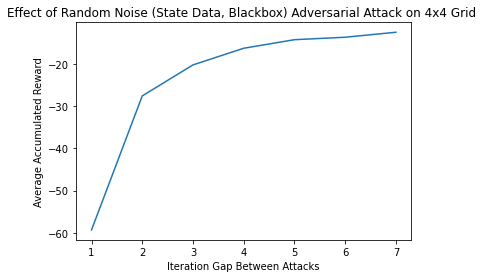

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(att_gap_range,results)
plt.title("Effect of Random Noise (State Data, Blackbox) Adversarial Attack on 4x4 Grid ")
plt.xlabel("Iteration Gap Between Attacks")
plt.ylabel("Average Accumulated Reward")